In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Spam.csv')
data.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 3)

# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   spamORham   5572 non-null   object
 2   Message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [5]:
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
data.head()

,spamORham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Renaming columns
data.rename(columns = {'spamORham': 'Target'}, inplace = True)

In [8]:
data.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['Target'].value_counts()

Target
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

data['Target'] = encode.fit_transform(data['Target'])

In [11]:
data.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check for Missing values.
data.isnull().sum()

Target     0
Message    0
dtype: int64

In [13]:
# Check for Duplicate values in dataset.
data.duplicated().sum()

403

In [14]:
# Droping duplicate values.
data = data.drop_duplicates(keep = 'first')

In [15]:
# Rechecking for duplicate values.
data.duplicated().sum()

0

In [16]:
data.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data.shape

(5169, 2)

# EDA

In [18]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

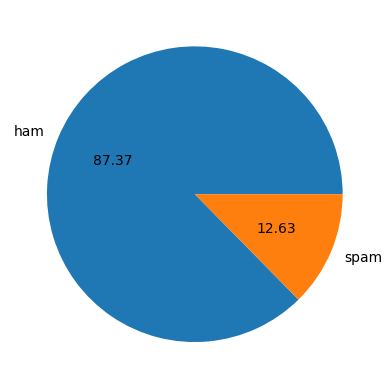

In [20]:
plt.pie(data['Target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [21]:
# From above figure we can say that Data is Imbalanced.
# Before that, we will do some preprocessing on our Message column.

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F2076TU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# Length of each sentence from Message column.
data['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Message, Length: 5169, dtype: int64

In [25]:
# Lets create new column and store this values there for referrence purpose.
data['num_characters'] = data['Message'].apply(len)

In [26]:
data.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# Tokenizing Message column and spliting words.
data['Message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [28]:
# Fetching number of words in each Message.
data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Message, Length: 5169, dtype: int64

In [29]:
# Lets create another columns and store this len of words there.
data['num_words'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [30]:
data.head()

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# Breaking meaningful sentences from Message columns.
data['Message'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Message, Length: 5169, dtype: object

In [32]:
# Length of sentences
data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Message, Length: 5169, dtype: int64

In [33]:
# Lets create another columns for length of sentences.
data['num_sentences'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
data.head()

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
# Description of num. of characters, words and sentences 
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# Lets look for description of num. of characters, words, sentences for Ham Messages.
data[data['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# Lets look for description of num. of characters, words, sentences for Spam Messages.
data[data['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

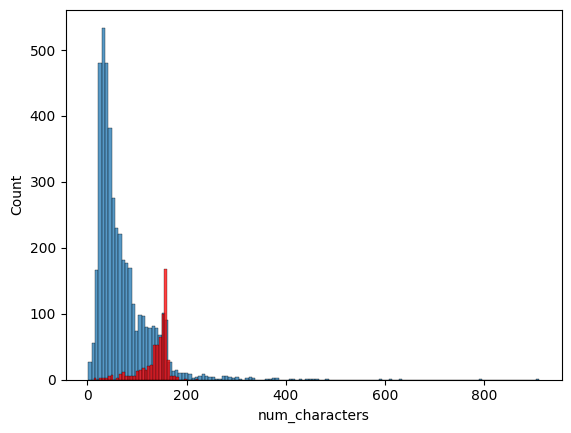

In [38]:
# Histogram plot
sns.histplot(data[data['Target'] == 0]['num_characters'])
sns.histplot(data[data['Target'] == 1]['num_characters'], color = 'red')

# Below shows count of characters from Message columns for 'Ham' and 'Spam' messages.
# Ham Messages contain more number of characters, whereas
# Spam Messages contain less number of characters.
# But if we look carefully on an Average, Spam Messages contain more characters than Ham Messages.

<Axes: xlabel='num_words', ylabel='Count'>

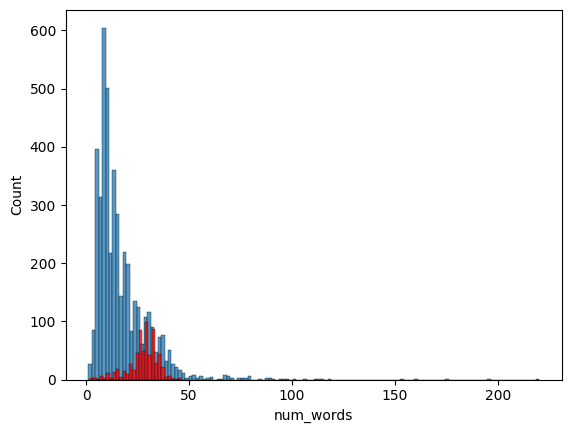

In [39]:
# Plotting histogram for number of words.
sns.histplot(data[data['Target'] == 0]['num_words'])
sns.histplot(data[data['Target'] == 1]['num_words'], color = 'red')

# Below shows count of words from Message columns for 'Ham' and 'Spam' messages.
# Ham Messages contain more number of words, whereas
# Spam Messages contain less number of words.
# But if we look carefully on an Average, Spam Messages contain more words than Ham words.

<Axes: xlabel='num_sentences', ylabel='Count'>

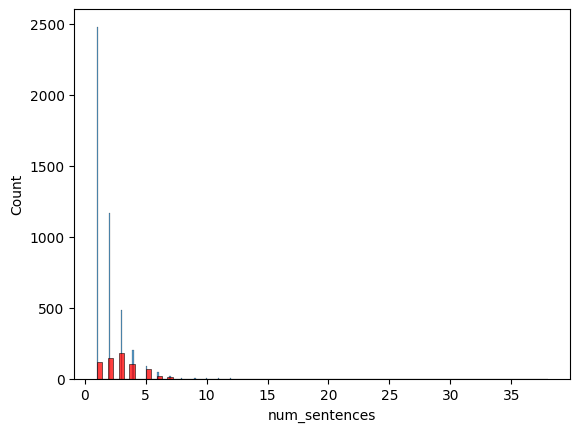

In [40]:
# Plotting histogram for number of sentences
sns.histplot(data[data['Target'] == 0]['num_sentences'])
sns.histplot(data[data['Target'] == 1]['num_sentences'], color = 'red')

# On an Average, Spam Messages contain more words than that of Ham Messages.

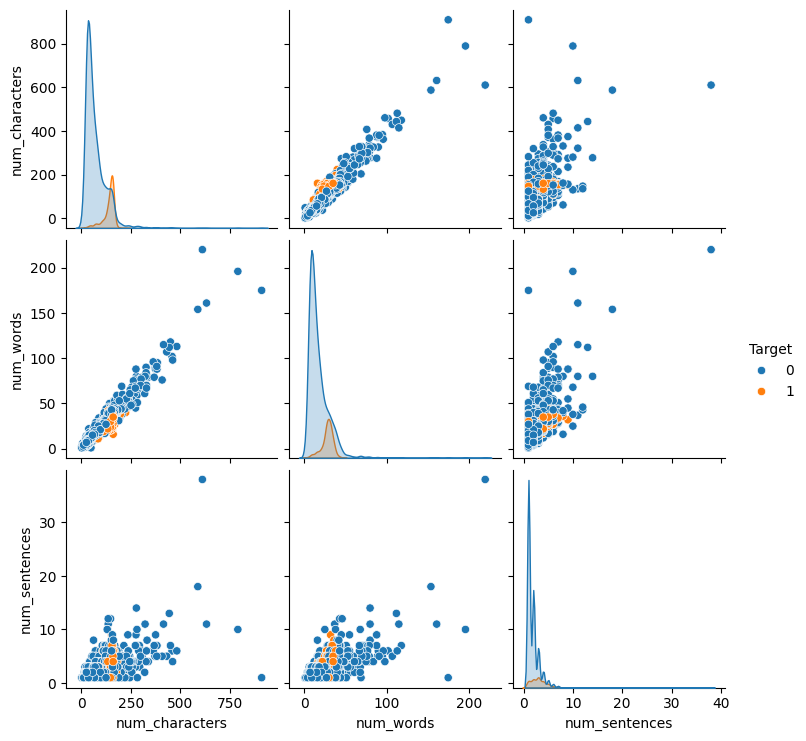

In [41]:
sns.pairplot(data, hue = 'Target')

In [42]:
df = data[['Target', 'num_characters', 'num_words', 'num_sentences']]

<Axes: >

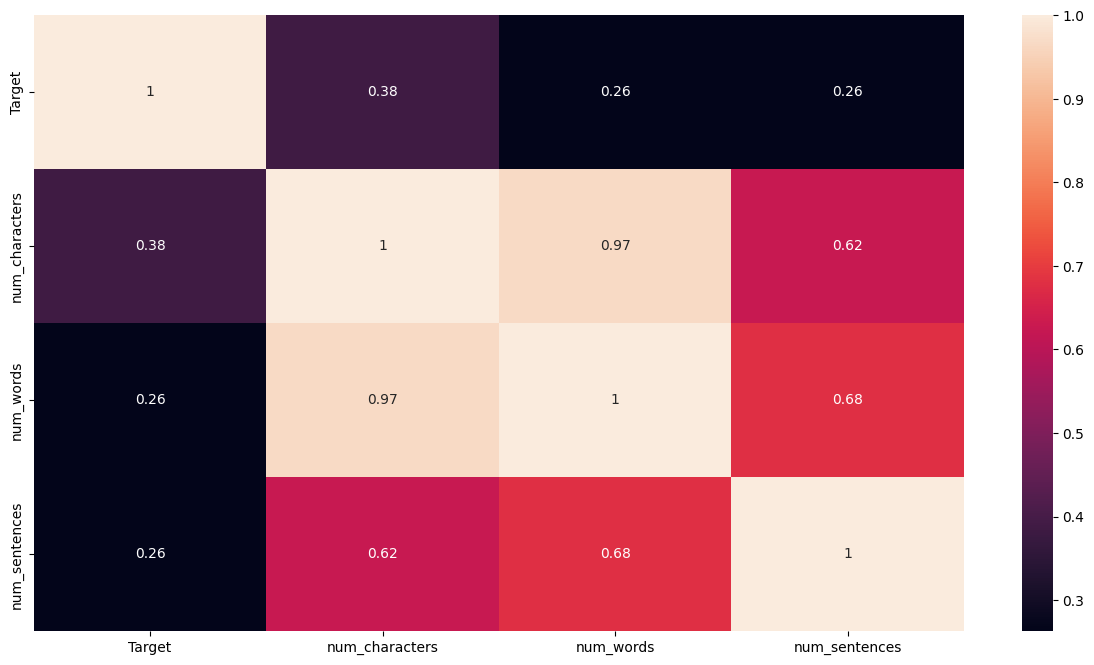

In [43]:
# Plotting Heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)

# Below graph represents that, as the num. of sentences w.r.t. num. of characters increases it tends towards Spam Messages, Same goes for num. of words.
# Also, Relation between num. of characters and num. of words shows us that Spam Messages contain more number of characters with higher number of words.

### Data Preprocessing.

# Here, we will do data preprocessing on texts i.e. Message column.
1. Lower case
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and Punctuation.
5. Stemming

In [44]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # Removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing Stopwords and Punctuation.
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)

    # Stemming 
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
# Testing of above function(transform_text)
transform_text("I loved the youtube lectures on Machine learning. How about you?")

# Here you can see that, all the characters are returned in lower case, words are Tokenized, 
# Removed Special characters, stopwords, and punctuation from sentences.
# Also, used Porter Stemmer to to convert words into their basic form.

'love youtub lectur machin learn'

In [46]:
# Creating new column which will contain transformed texts.
data['Transformed_text'] = data['Message'].apply(transform_text)

In [47]:
data.head()

,Target,Message,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Word Cloud

In [48]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

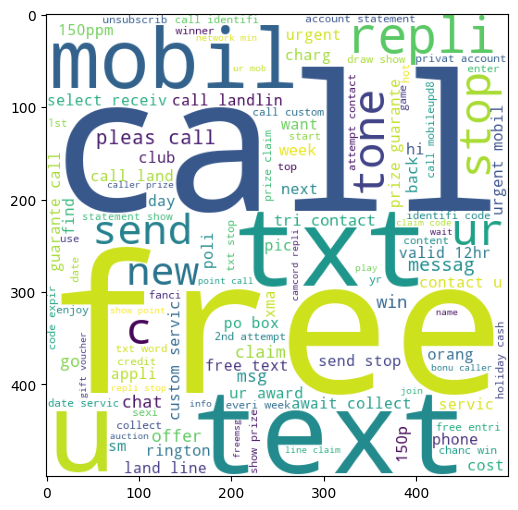

In [49]:
# Generating word cloud for Spam Messages.
spam_wc = wc.generate(data[data['Target'] == 1]['Transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

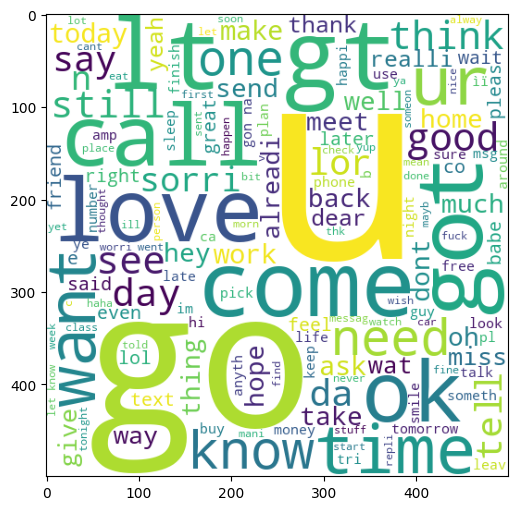

In [50]:
# Generating word cloud for Ham Messages.
ham_wc = wc.generate(data[data['Target'] == 0]['Transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [51]:
data[data['Target'] == 1]['Transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [52]:
# Getting most used word from Spam Messages.

spam_corpus = []
for msg in data[data['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter

Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [56]:
# Creating Dataframe of most common words from spam messages.
spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ['Words', 'Count'])
spam_words

,Words,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


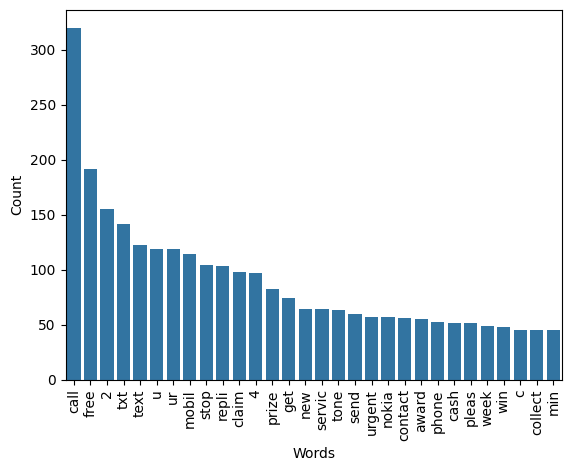

In [57]:
# Plotting most common words from spam messages.
sns.barplot(x = spam_words['Words'], y = spam_words['Count'])
plt.xticks(rotation = 'vertical')
plt.show()

In [58]:
data[data['Target'] == 0]['Transformed_text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [59]:
# Getting most used words from Ham messages.

ham_corpus = []
for msg in data[data['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [61]:
len(ham_corpus)

35404

In [62]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [63]:
ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['Words', 'Count'])
ham_words

,Words,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


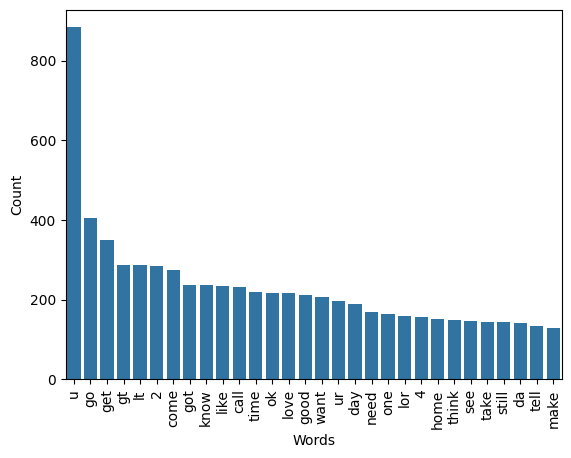

In [64]:
# Plotting most common words fro Ham messages
sns.barplot(x = ham_words['Words'], y = ham_words['Count'])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [66]:
x = tfidf.fit_transform(data['Transformed_text']).toarray()

In [67]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
x.shape

(5169, 6708)

In [69]:
y = data['Target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
# Gaussian Performance Evaluation
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))

Accuracy: 0.8636363636363636
Confusion Matrix:
 [[772 117]
 [ 24 121]]
Precision: 0.5084033613445378


In [75]:
# Multinomial Performance Evaluation
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred2))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred2))
print('Precision:', precision_score(y_test, y_pred2))

Accuracy: 0.9613152804642167
Confusion Matrix:
 [[888   1]
 [ 39 106]]
Precision: 0.9906542056074766


In [76]:
# Bernoulli Performance Evaluation
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred3))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))

Accuracy: 0.9661508704061895
Confusion Matrix:
 [[885   4]
 [ 31 114]]
Precision: 0.9661016949152542


In [77]:
# So far MultinomialNB shows good accuracy as well as best precision score.
# As this dataset is Imbalanced Precision score will matter the most.

In [78]:
# Lets try some other Algorithms and see which Algorithm is best for your data.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [80]:
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [81]:
# Creating this function to get accuracy and precision scores from each classifier.
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [82]:
train_classifier(lr, x_train, y_train, x_test, y_test)

(0.9439071566731141, 0.865546218487395)

In [83]:
# Getting list of Accuracy and Precision scores of all scores.
accuracy_list = []
precision_list = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print('For -', name)
    print('Accuracy -', current_accuracy)
    print('Precision -', current_precision)
    print('-------------------------------------------------')

    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)

For - LR
Accuracy - 0.9439071566731141
Precision - 0.865546218487395
-------------------------------------------------
For - SVC
Accuracy - 0.971953578336557
Precision - 0.9393939393939394
-------------------------------------------------
For - NB
Accuracy - 0.9613152804642167
Precision - 0.9906542056074766
-------------------------------------------------
For - DT
Accuracy - 0.9352030947775629
Precision - 0.8095238095238095
-------------------------------------------------
For - KN
Accuracy - 0.8965183752417795
Precision - 1.0
-------------------------------------------------
For - RF
Accuracy - 0.9700193423597679
Precision - 0.9913793103448276
-------------------------------------------------


C:\Users\F2076TU\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For - AdaBoost
Accuracy - 0.9477756286266924
Precision - 0.8421052631578947
-------------------------------------------------
For - BgC
Accuracy - 0.9613152804642167
Precision - 0.8776978417266187
-------------------------------------------------
For - ETC
Accuracy - 0.9738878143133463
Precision - 0.9916666666666667
-------------------------------------------------
For - GBC
Accuracy - 0.9506769825918762
Precision - 0.9519230769230769
-------------------------------------------------
For - XGB
Accuracy - 0.9748549323017408
Precision - 0.968503937007874
-------------------------------------------------


In [84]:
# Creating DataFrame of Accuracy and Precision scores
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_list, 'Precision' : precision_list})
performance_df = performance_df.sort_values('Precision', ascending = False)
# As, we will consider precision values for algorithm selecvtion we will sort our data by precision score.

In [85]:
performance_df

,Algorithm,Accuracy,Precision
4,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,XGB,0.974855,0.968504
9,GBC,0.950677,0.951923
1,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
0,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,XGB,Accuracy,0.974855
5,GBC,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.947776


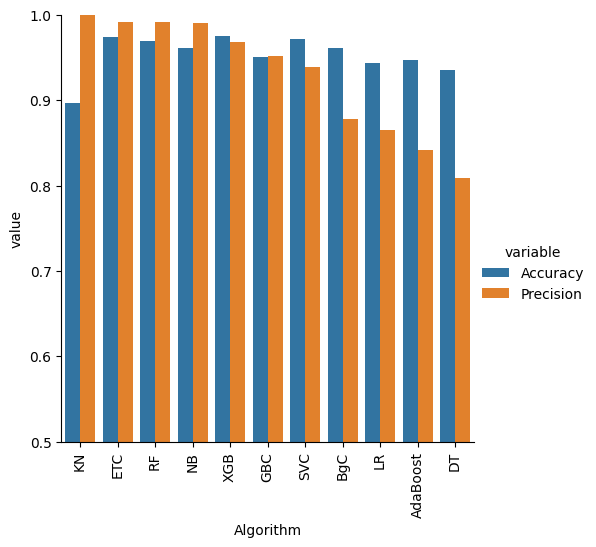

In [96]:
# Plotting graph for Accuracy and Precision scores.
sns.catplot(x = 'Algorithm', y = 'value', data = performance_df1, hue = 'variable', kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Improvement

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [119]:
x = tfidf.fit_transform(data['Transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
x.shape

(5169, 3000)

In [121]:
y = data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [123]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [125]:
# Gaussian Performance Evaluation
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))

Accuracy: 0.8607350096711799
Confusion Matrix:
 [[769 120]
 [ 24 121]]
Precision: 0.5020746887966805


In [126]:
# Multinomial Performance Evaluation
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred2))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred2))
print('Precision:', precision_score(y_test, y_pred2))

Accuracy: 0.9729206963249516
Confusion Matrix:
 [[888   1]
 [ 27 118]]
Precision: 0.9915966386554622


In [107]:
# Bernoulli Performance Evaluation
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred3))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))

Accuracy: 0.9729206963249516
Confusion Matrix:
 [[884   5]
 [ 23 122]]
Precision: 0.9606299212598425


In [108]:
# Lets try some other Algorithms and see which Algorithm is best for your data.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [110]:
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [111]:
accuracy_list = []
precision_list = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print('For -', name)
    print('Accuracy -', current_accuracy)
    print('Precision -', current_precision)
    print('-------------------------------------------------')

    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)

For - LR
Accuracy - 0.9468085106382979
Precision - 0.8688524590163934
-------------------------------------------------
For - SVC
Accuracy - 0.97678916827853
Precision - 0.9548872180451128
-------------------------------------------------
For - NB
Accuracy - 0.9729206963249516
Precision - 0.9915966386554622
-------------------------------------------------
For - DT
Accuracy - 0.9332688588007737
Precision - 0.8275862068965517
-------------------------------------------------
For - KN
Accuracy - 0.9168278529980658
Precision - 1.0
-------------------------------------------------
For - RF
Accuracy - 0.971953578336557
Precision - 0.9754098360655737
-------------------------------------------------


C:\Users\F2076TU\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For - AdaBoost
Accuracy - 0.9506769825918762
Precision - 0.8671875
-------------------------------------------------
For - BgC
Accuracy - 0.9622823984526112
Precision - 0.8840579710144928
-------------------------------------------------
For - ETC
Accuracy - 0.9777562862669246
Precision - 0.9841269841269841
-------------------------------------------------
For - GBC
Accuracy - 0.9468085106382979
Precision - 0.96875
-------------------------------------------------
For - XGB
Accuracy - 0.9680851063829787
Precision - 0.9375
-------------------------------------------------


In [112]:
# Creating DataFrame of Accuracy and Precision scores
performance_df_3000 = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_3000' : accuracy_list, 'Precision_max_3000' : precision_list})
performance_df_3000 = performance_df_3000.sort_values('Precision_max_3000', ascending = False)
# As, we will consider precision values for algorithm selecvtion we will sort our data by precision score.

In [113]:
performance_df_3000

,Algorithm,Accuracy_max_3000,Precision_max_3000
4,KN,0.916828,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
9,GBC,0.946809,0.968750
1,SVC,0.976789,0.954887
10,XGB,0.968085,0.937500
7,BgC,0.962282,0.884058
0,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [115]:
new_performance_df = performance_df.merge(performance_df_3000, on = 'Algorithm')
new_performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000
0,KN,0.896518,1.000000,0.916828,1.000000
1,ETC,0.973888,0.991667,0.977756,0.984127
2,RF,0.970019,0.991379,0.971954,0.975410
3,NB,0.961315,0.990654,0.972921,0.991597
4,XGB,0.974855,0.968504,0.968085,0.937500
5,GBC,0.950677,0.951923,0.946809,0.968750
6,SVC,0.971954,0.939394,0.976789,0.954887
7,BgC,0.961315,0.877698,0.962282,0.884058
8,LR,0.943907,0.865546,0.946809,0.868852
9,AdaBoost,0.947776,0.842105,0.950677,0.867188


In [116]:
# Voting Classifier
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb  = MultinomialNB()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)


from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('SVC', svc), ('NB', mnb), ('RF', rfc)], voting = 'soft')
voting.fit(x_train, y_train)

y_vote = voting.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_vote))
print('Precision:', precision_score(y_test, y_vote))

Accuracy: 0.9806576402321083
Precision: 0.9844961240310077


In [117]:
# Applying Stacking
estimators = [('SVC', svc), ('NB', mnb), ('RF', rfc)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
clf.fit(x_train, y_train)

y_stack = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_stack))
print('Precision:', precision_score(y_test, y_stack))

Accuracy: 0.9816247582205029
Precision: 0.9436619718309859


# Save Model file.

In [ ]:
# import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))